Exp 8 Implementation of LSTM for Time Series Data

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

[0.000e+00 1.000e-01 2.000e-01 ... 1.997e+02 1.998e+02 1.999e+02]


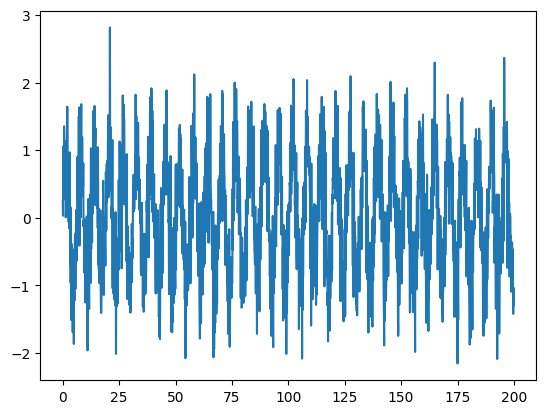

In [2]:
data_time = np.arange(0, 200, 0.1)
sin_values = np.sin(data_time) + np.random.normal(scale=0.5, size=len(data_time))
plt.plot(data_time, sin_values, label='sine (with noise)');

In [ ]:
data_full = pd.DataFrame(dict(sine=sin_values), index=data_time, columns=['sine'])
data_full.head()

len_train = int(len(data_full) * 0.8)
len_test = len(data_full) - len_train
train, test = data_full.iloc[0:len_train], data_full.iloc[len_train:len(data_full)]

In [ ]:
def gen_data(X, y, num_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - num_steps):
        Xs.append(X.iloc[i:(i + num_steps)].values)
        ys.append(y.iloc[i + num_steps])
    return np.array(Xs), np.array(ys)

num_steps = 10
trainX, trainY = gen_data(train, train.sine, num_steps)
testX, testY = gen_data(test, test.sine, num_steps)

In [ ]:
lstm_model = keras.Sequential()
lstm_model.add(keras.layers.LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
lstm_model.add(keras.layers.Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

In [ ]:
callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)]

In [ ]:
history = lstm_model.fit(
    trainX, trainY,
    epochs=30,
    batch_size=16,
    validation_split=0.1,
    shuffle=False,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)],
)

Epoch 1/30
90/90 [==============================] - 4s 16ms/step - loss: 0.3711 - val_loss: 0.3620
Epoch 2/30
90/90 [==============================] - 1s 11ms/step - loss: 0.3185 - val_loss: 0.3583
Epoch 3/30
90/90 [==============================] - 1s 11ms/step - loss: 0.3165 - val_loss: 0.3561
Epoch 4/30
90/90 [==============================] - 1s 11ms/step - loss: 0.3157 - val_loss: 0.3541
Epoch 5/30
90/90 [==============================] - 1s 10ms/step - loss: 0.3150 - val_loss: 0.3520
Epoch 6/30
90/90 [==============================] - 1s 12ms/step - loss: 0.3142 - val_loss: 0.3495
Epoch 7/30
90/90 [==============================] - 1s 14ms/step - loss: 0.3133 - val_loss: 0.3471
Epoch 8/30
90/90 [==============================] - 1s 13ms/step - loss: 0.3124 - val_loss: 0.3454
Epoch 9/30
90/90 [==============================] - 1s 11ms/step - loss: 0.3118 - val_loss: 0.3441
Epoch 10/30
90/90 [==============================] - 1s 11ms/step - loss: 0.3114 - val_loss: 0.3432
Epoch 11/

In [ ]:
lstm_model.evaluate(testX)

13/13 [==============================] - 0s 2ms/step - loss: 0.0000e+00


0.0

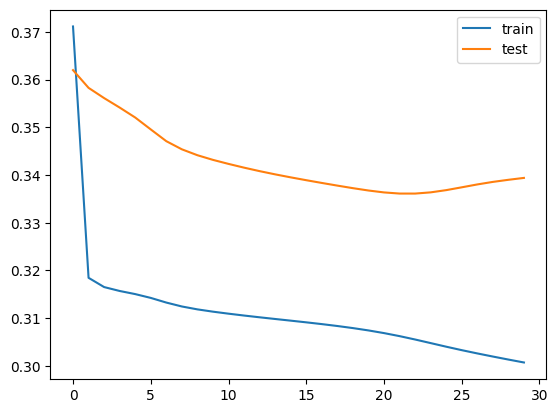

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

13/13 [==============================] - 1s 6ms/step


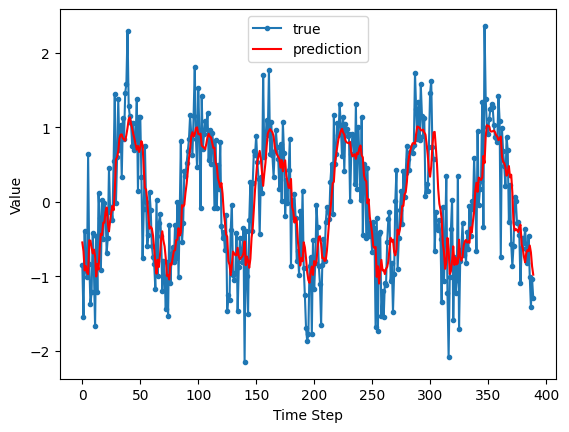

In [ ]:
y_pred = lstm_model.predict(testX)
plt.plot(testY, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();